# **Загружаем датасет, библиотеки и знакомимся с данным**


In [ ]:
import pandas as pd #Импортируем библиотеки
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

df = pd.read_csv('titanic.csv', index_col='PassengerId') #загружаем датасет и чтобы не совпадали колонки с подсчетом строк и id каждого пассажира - прописываем index_col='PassengerId'


In [ ]:
df.head(13) #проверяем загрузился ли датасет и знакомимся с ним

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# **Первичный анализ данных**

In [ ]:
df.columns #смотрим колонки

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()  #у нас 6 колонок с числовыми данными и есть 5 категориальных
            #Датасет небольшой 891 строка и 11 колонок

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.describe() #можно сразу узнать средний возраст пассажиров - 29 лет, так же каких то выбросов или отклонений не видно

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Анализируем данные и смотрим, что влияет на наш таргет**


> **в нашем случае мы ищем, что влияет на то, выживет ли человек**












In [ ]:
df['Survived'].value_counts() #в колонке, которую мы будем предсказывать, один класс больше другого в 1.6 раз - не очень хорошо для нас

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Sex'].value_counts() #количество женщин почти в 2 раза меньше мужчин

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.groupby(['Survived', 'Sex'])["Fare"].count() #тем не мение выживших мужчин в 2 раза меньше выживших женщин

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Fare, dtype: int64

In [ ]:
df.groupby(["Sex", "Pclass"])["Fare"].count() #тут можно заметить, что людей 3 класса было больше всего, а 2 класса - меньше всего

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Fare, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

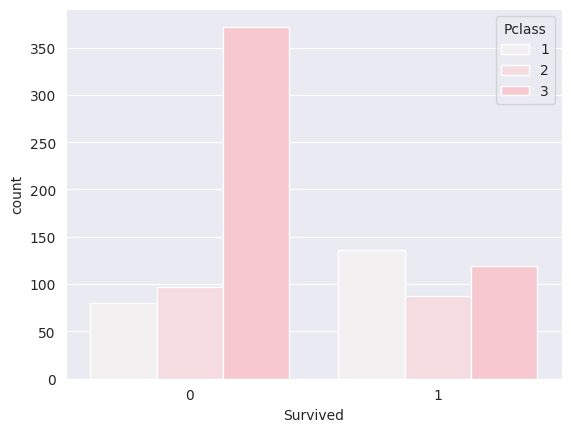

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x='Survived', hue='Pclass', data=df,  color='pink')  #среди 3 класса так же больше всего погибших

In [ ]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,147,2
2,1,1,190,0,38.0,1,0,596,71.2833,81,0
3,1,3,353,0,26.0,0,0,669,7.9250,147,2
4,1,1,272,0,35.0,1,0,49,53.1000,55,2
5,0,3,15,1,35.0,0,0,472,8.0500,147,2


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Name'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

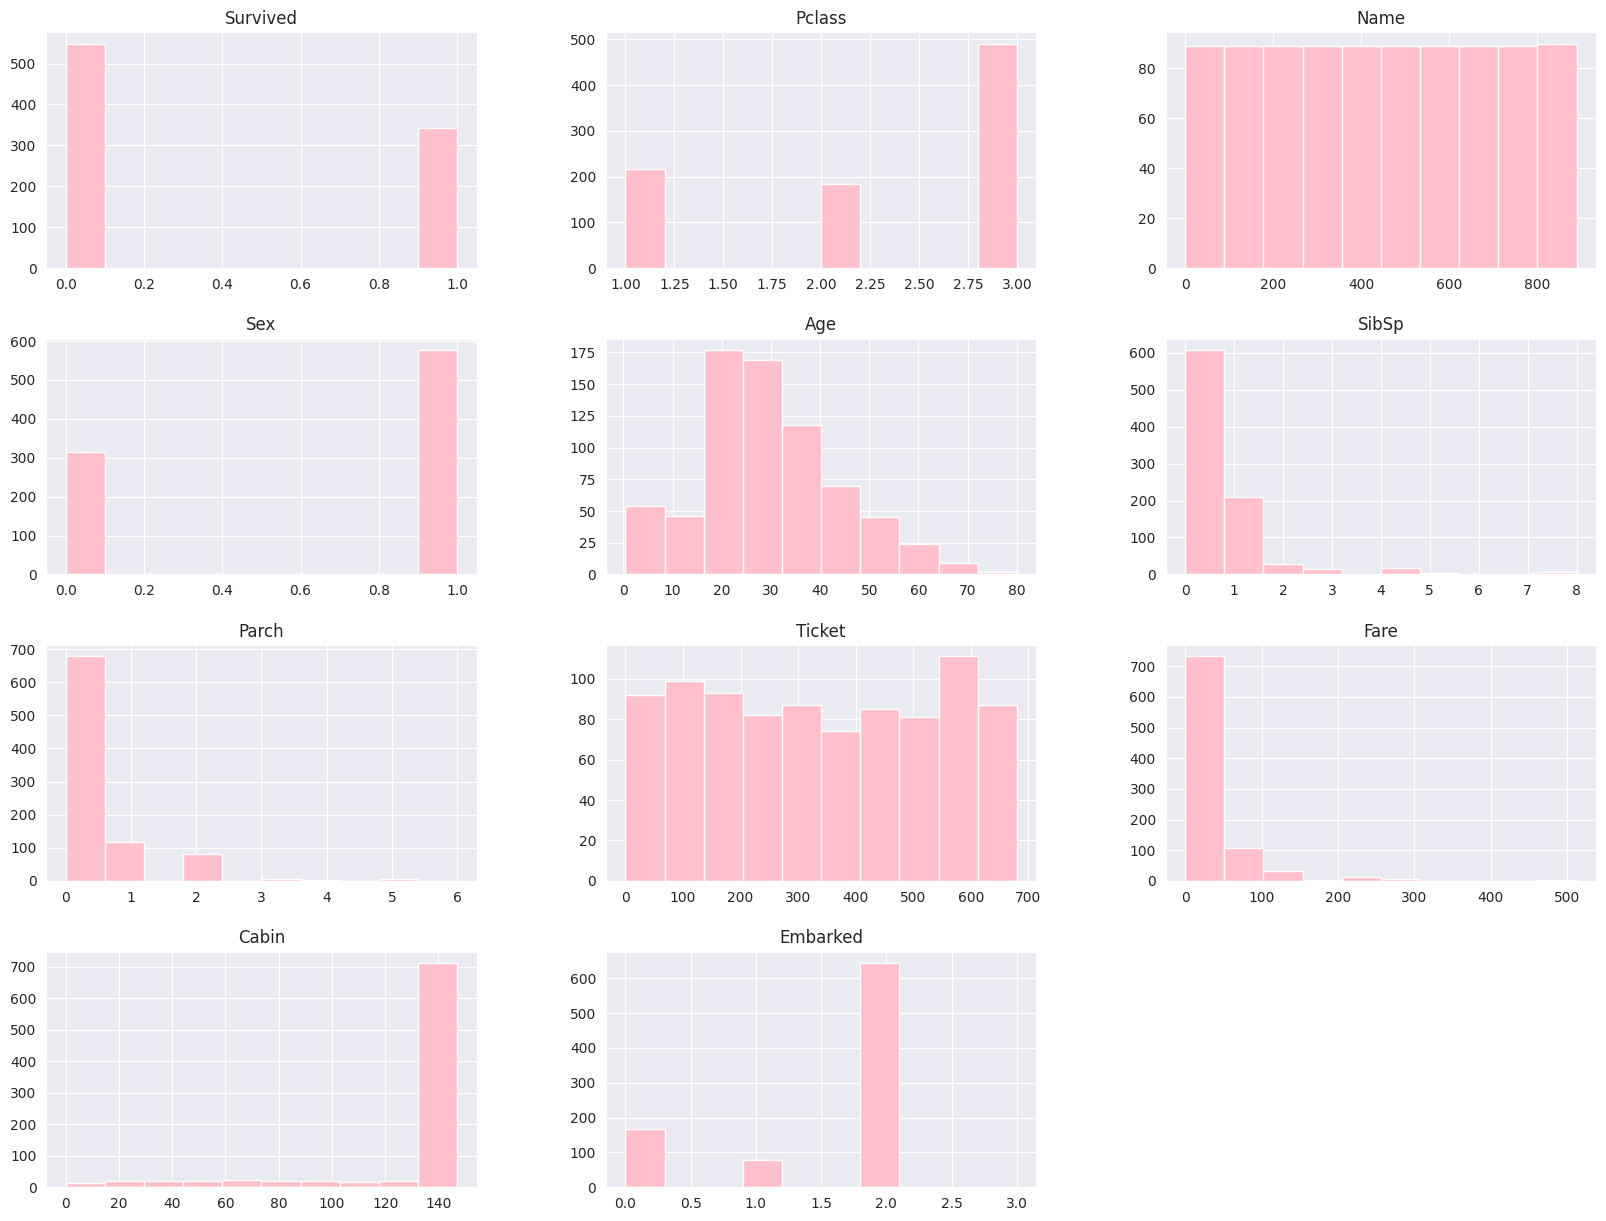

In [ ]:
encoded_data.hist(figsize=(20,15), color='pink') #смотрим на красивые диаграммы (вау вау вау)

<Axes: >

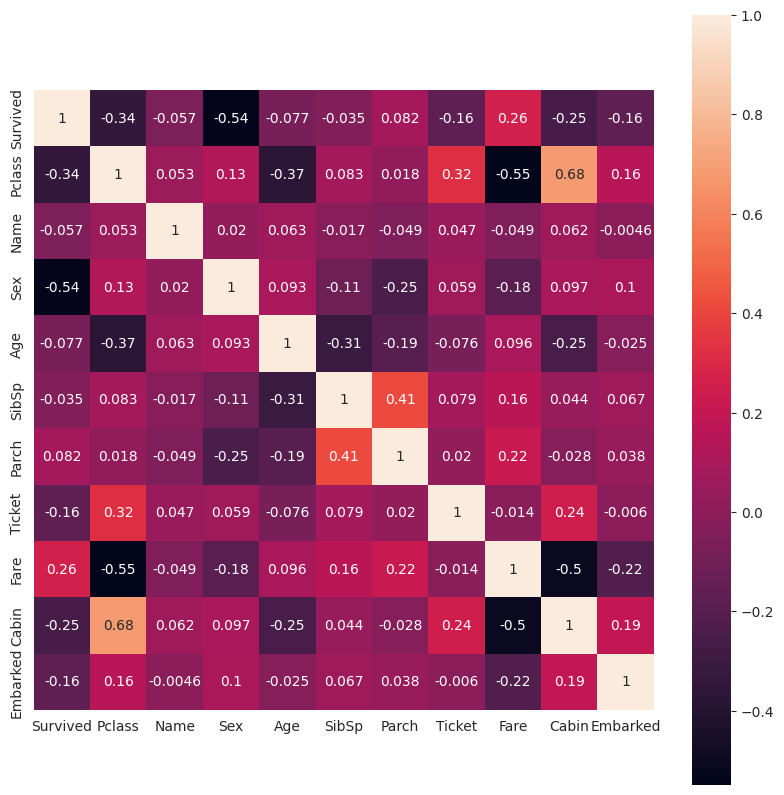

In [ ]:
 #смотрим есть ли линейная зависимоть у таргета

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True) #можем заметить, что есть пересечения с ценой билета и полом, а с возрастом почти нет пересечений

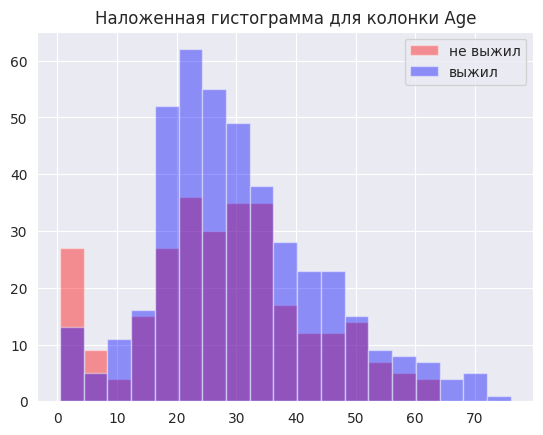

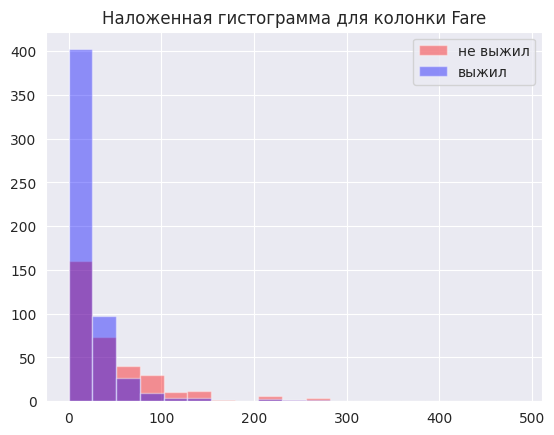

In [ ]:
for i in ['Age', 'Fare']: #в цикл закинули 2 колонки
  died = list(df[df['Survived'] == 0][i].dropna()) #создали переменную, которая содержит погибших пассажиров
  survived = list(df[df['Survived'] == 1][i].dropna()) #создали еще одну переменную, но уже для выживших
  xmin = min(min(died), min(survived)) #переменная для хранения мин значения
  xmax = max(max(died), max(survived)) #переменная для хранения макс значения
  width = (xmax - xmin) / 20 #настройка ширины
  sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
  sns.distplot(died, color='b', kde=False, bins=np.arange(xmin, xmax, width)) #делаем  2 диаграмку и накладываем
  plt.legend(['не выжил', 'выжил']) #обозначим цвета
  plt.title('Наложенная гистограмма для колонки {}'.format(i)) #заголовок красивый
  plt.show() #можно заметить, что люди с возрастом 20-30 выжило куда больше, чем погибло, но с детьми иная ситуация

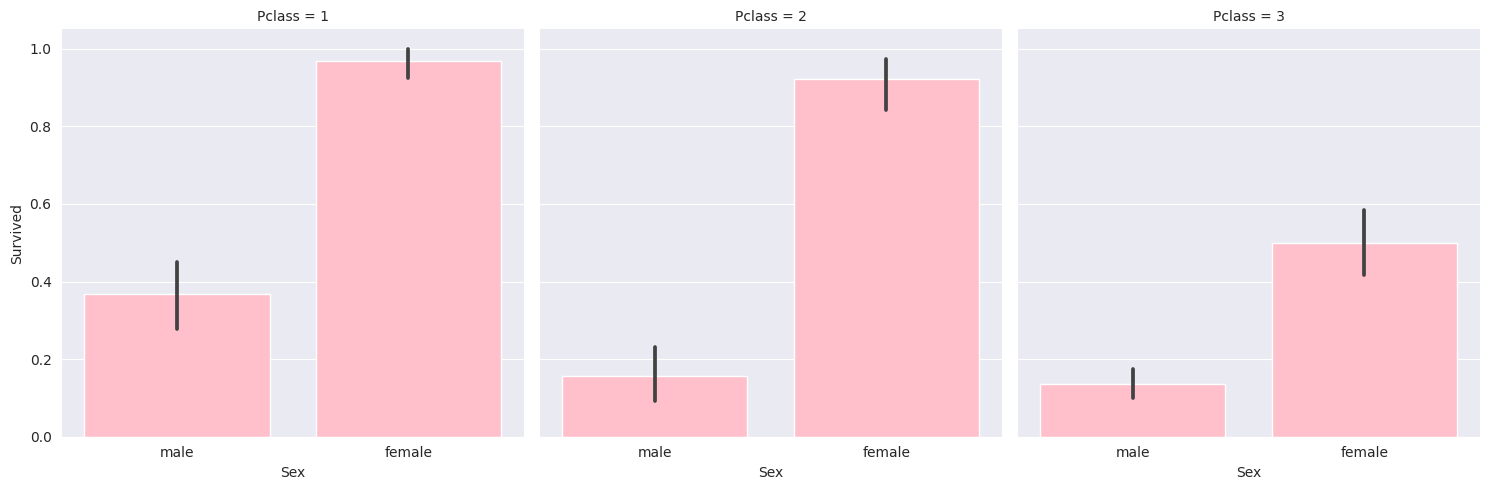

In [ ]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=1, color='pink' ) #тут так же видно, что 1 класс самый живучий и женщины куда чаще выживали чем мужчины

<Figure size 640x480 with 0 Axes>

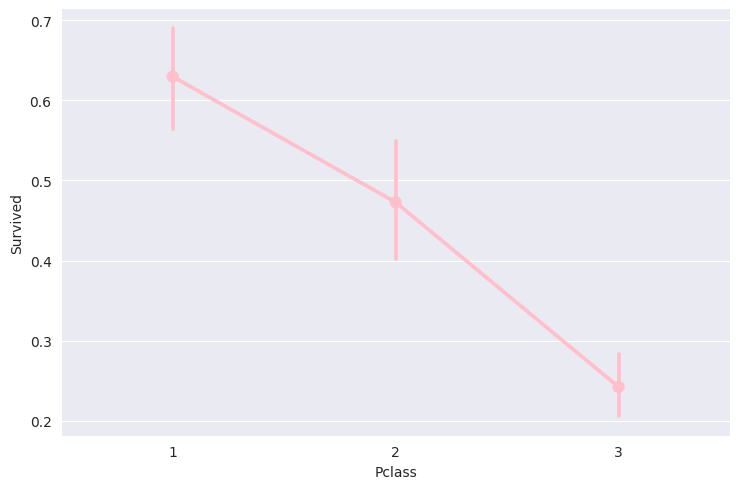

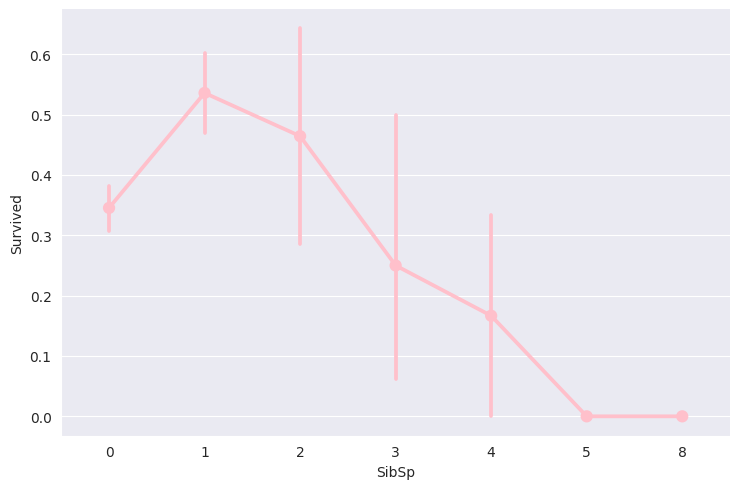

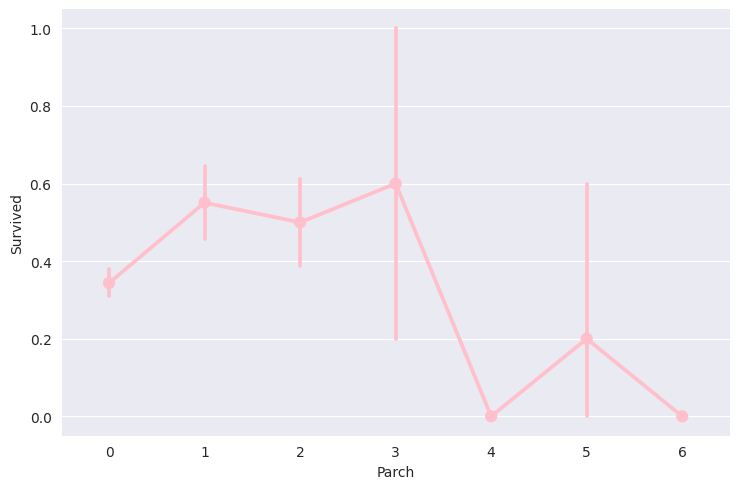

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']): #цикл для колонок
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5, color='pink') #тут мы видим влияение класса пассажира, количество братьев и сестер, количество родителей и детей на выживаемость

# **Вывод** по диаграммам:
* Люди "высшего" [1] класса выживали чаще остальных классов
* Чем больше родственников(братья, сестры, родители и дети), тем меньше выживаемость
* Дети больше умирали чем выживали
* Люди 20-30 лет чаще оставались в живых
* Людей с дешевым билетами больше выжило чем погибло, а у людей с дорогими билетами все наоборот
* Узнали о неравном распределении классов в некоторых признаках и тд




# **Обработка данных и  подготовка к созданию модели**

In [ ]:
df.isnull().any().any() #ищем пропуски

True

In [ ]:
df.isnull().any() #есть пропуски в 3 колонках

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [ ]:
df.loc[:, ['Cabin', 'Embarked']] = df.loc[:, ['Cabin', 'Embarked']].fillna('None') #заполняем категориальные пропуски словом None
df['Age'] = df['Age'].fillna(df['Age'].median()) #заполняем числовые пропуски медианой

In [ ]:
def get_cabin_letter(row): #создаем новую колонку из номеров кабин по первой букве можно узнать тип кабины
    return row['Cabin'][0]

df['cabin_type'] = df.apply(get_cabin_letter, axis=1)
df.head(13)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_type
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,N
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,None,Q,N
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S,N
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S,N


In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = df.rename(columns = {'Sex_male':'Sex'}) #кодируем колонку пола
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_type,Sex
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,None,S,N,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,C,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,None,S,N,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,C,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,None,S,N,1


In [ ]:
df = pd.get_dummies(df, columns=['Embarked','cabin_type'])  #кодируем оставшиемся нужные кат. колонки
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,...,Embarked_S,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_N,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,None,1,...,1,0,0,0,0,0,0,0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,None,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,1,0,0,1,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,None,1,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
cont_features = ['Name', 'Ticket', 'Cabin']
df.drop(cont_features, axis= 1, inplace=True)
df.head(13) #такие признаки как имя,билет и старую колонку с кабинами можно убрать (у них всегда уникальное значение и нет (или почти нет) влияния на ответ)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_N,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,1,0,0,0,1,0,0,0,0,0,0,0,1,0
6,0,3,28.0,0,0,8.4583,1,0,0,1,0,0,0,0,0,0,0,0,1,0
7,0,1,54.0,0,0,51.8625,1,0,0,0,1,0,0,0,0,1,0,0,0,0
8,0,3,2.0,3,1,21.0750,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9,1,3,27.0,0,2,11.1333,0,0,0,0,1,0,0,0,0,0,0,0,1,0


<Axes: >

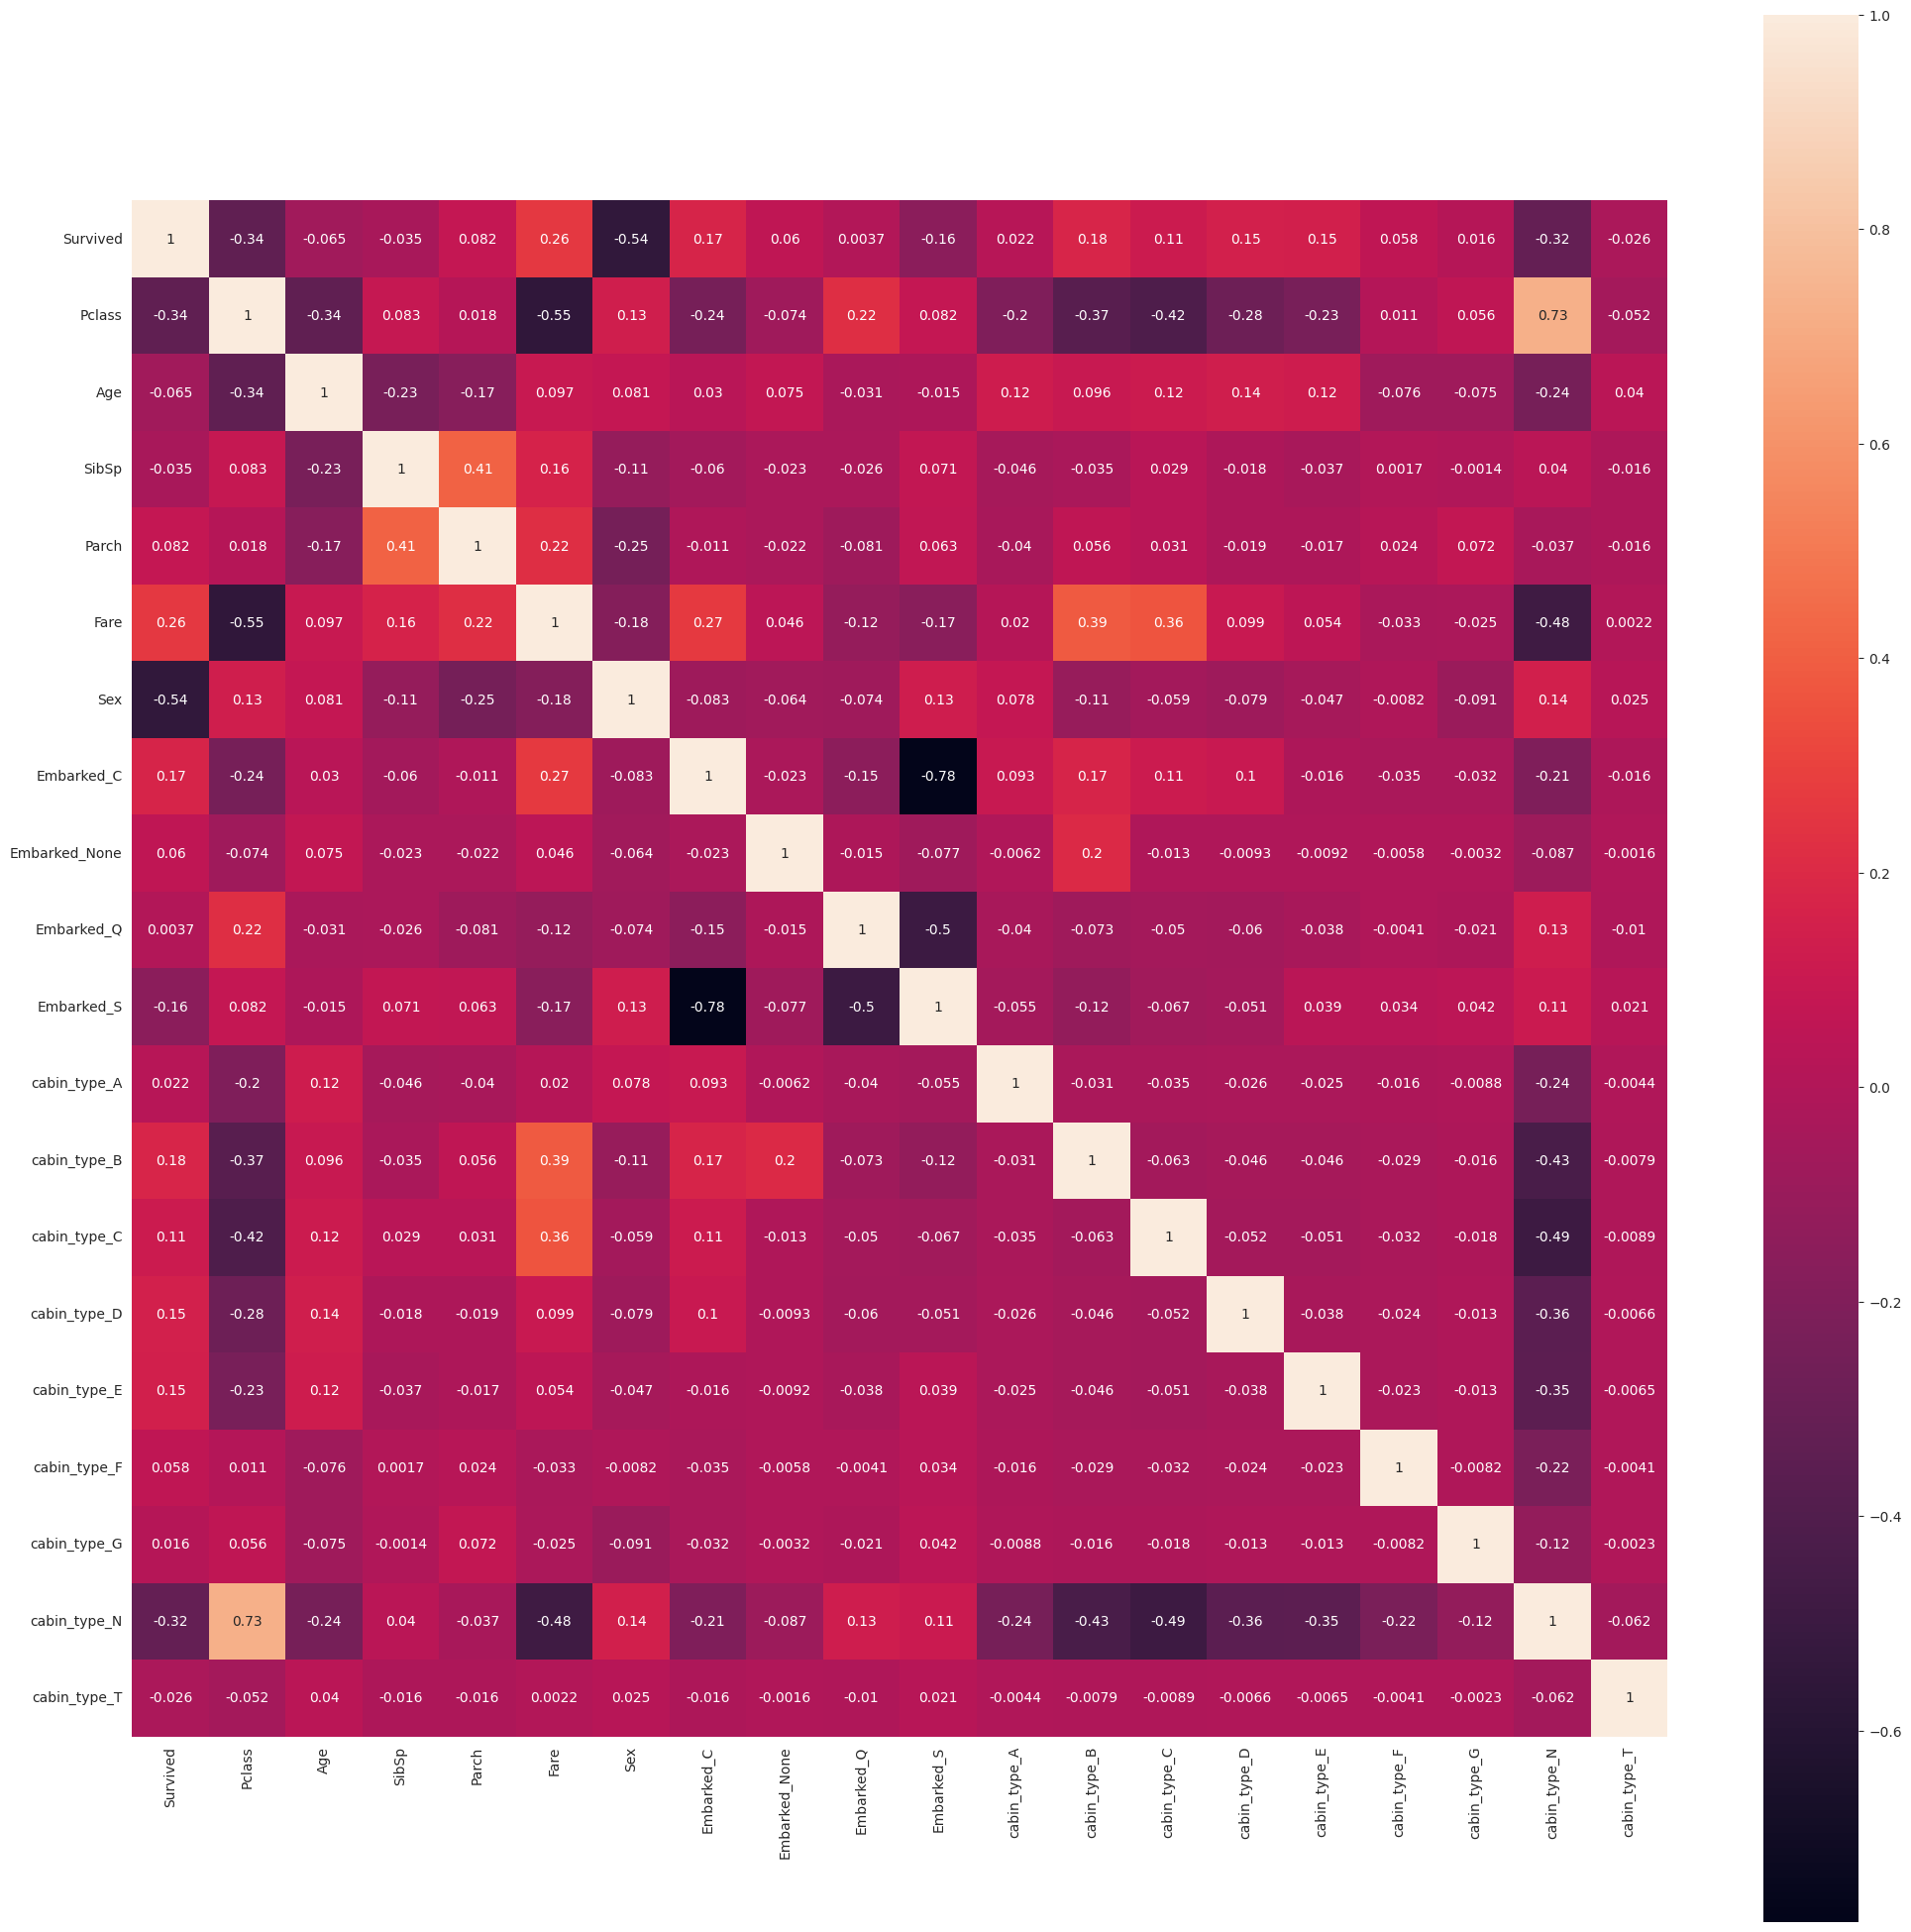

In [ ]:
plt.subplots(figsize=(25,25)) #смотрим на пересечения новых закодированных данных
sns.heatmap(df.corr(), square=True, annot=True)

In [ ]:
df.drop('Survived', axis=1) #датасет без таргета

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_N,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,3,26.0,0,0,7.9250,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,3,35.0,0,0,8.0500,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,1,0,0,0,1,0,0,0,0,0,0,0,1,0
888,1,19.0,0,0,30.0000,0,0,0,0,1,0,1,0,0,0,0,0,0,0
889,3,28.0,1,2,23.4500,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
X = np.array(df[df._get_numeric_data().columns].drop('Survived', axis=1)) #помещаем в перменную X наши обработанные и закодированные данные
y = np.array(df['Survived'])  #помещаем в перменную y колонку, которую мы будем предсказывать

In [ ]:
y #проверка

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
X #проверка

array([[ 3., 22.,  1., ...,  0.,  1.,  0.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 3., 28.,  1., ...,  0.,  1.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [ ]:
#Стандартизация данных
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X #проверка

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.06715343,
         0.54492498, -0.03352008],
       [-1.56610693,  0.66386103,  0.43279337, ..., -0.06715343,
        -1.835115  , -0.03352008],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.06715343,
         0.54492498, -0.03352008],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.06715343,
         0.54492498, -0.03352008],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -0.06715343,
        -1.835115  , -0.03352008],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.06715343,
         0.54492498, -0.03352008]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #разделяем на тестовую и тренировочную часть

# **Вывод**

*   Мы загрузили данные
*   Посмотрели данные
*   Узнали закономерности наших признаков и таргета (анализировали)
*   Обработали данные (заполнили пропуски, поработали категориальные фичи, убрали ненужные колонки и масштабировали оставшиеся признаки, так же разделили на train и test)




In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred) * 100
acc_log

80.97014925373134

In [ ]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.7924094881398251


In [ ]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred) * 100
acc_svc

81.34328358208955

In [ ]:
print(cross_val_score(svc, X, y, cv=10, scoring='accuracy').mean())

0.8002496878901374


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred) * 100
acc_decision_tree

75.74626865671642

In [ ]:
print(cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy').mean())

0.7778027465667915


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred) * 100
acc_random_forest

81.34328358208955

In [ ]:
print(cross_val_score(random_forest, X, y, cv=10, scoring='accuracy').mean())

0.8103870162297128


In [ ]:
from sklearn.metrics import classification_report #все круто
Class = ['0', '1']
print(classification_report(y_test, y_pred, target_names= Class))

In [ ]:
from sklearn.metrics import classification_report #все круто
Class = ['0', '1']
print(classification_report(y_test, y_pred, target_names= Class))